In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [136]:
wine_data=pd.read_csv('data/wine.csv',encoding='utf-8')

In [137]:
wine_data.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [138]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0


In [139]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
class                   1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


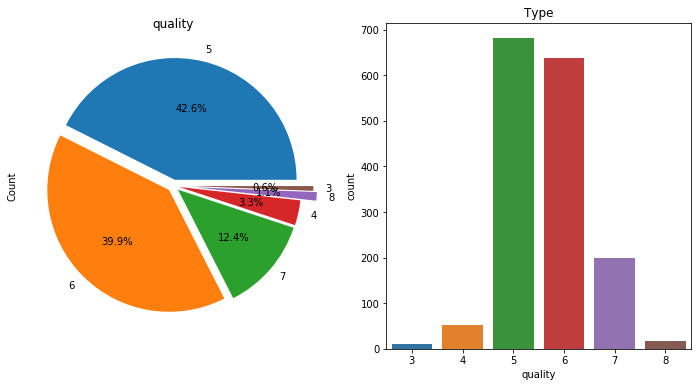

In [140]:
f,ax=plt.subplots(1,2,figsize=(12,6))

wine_data['quality'].value_counts().plot.pie(ax=ax[0],explode=(0.05, 0.05, 0.05, 0.05, 0.18, 0.15),autopct='%1.1f%%')
ax[0].set_title('quality')
ax[0].set_ylabel('Count')

sns.countplot('quality', data=wine_data,ax=ax[1])
ax[1].set_title('Type')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


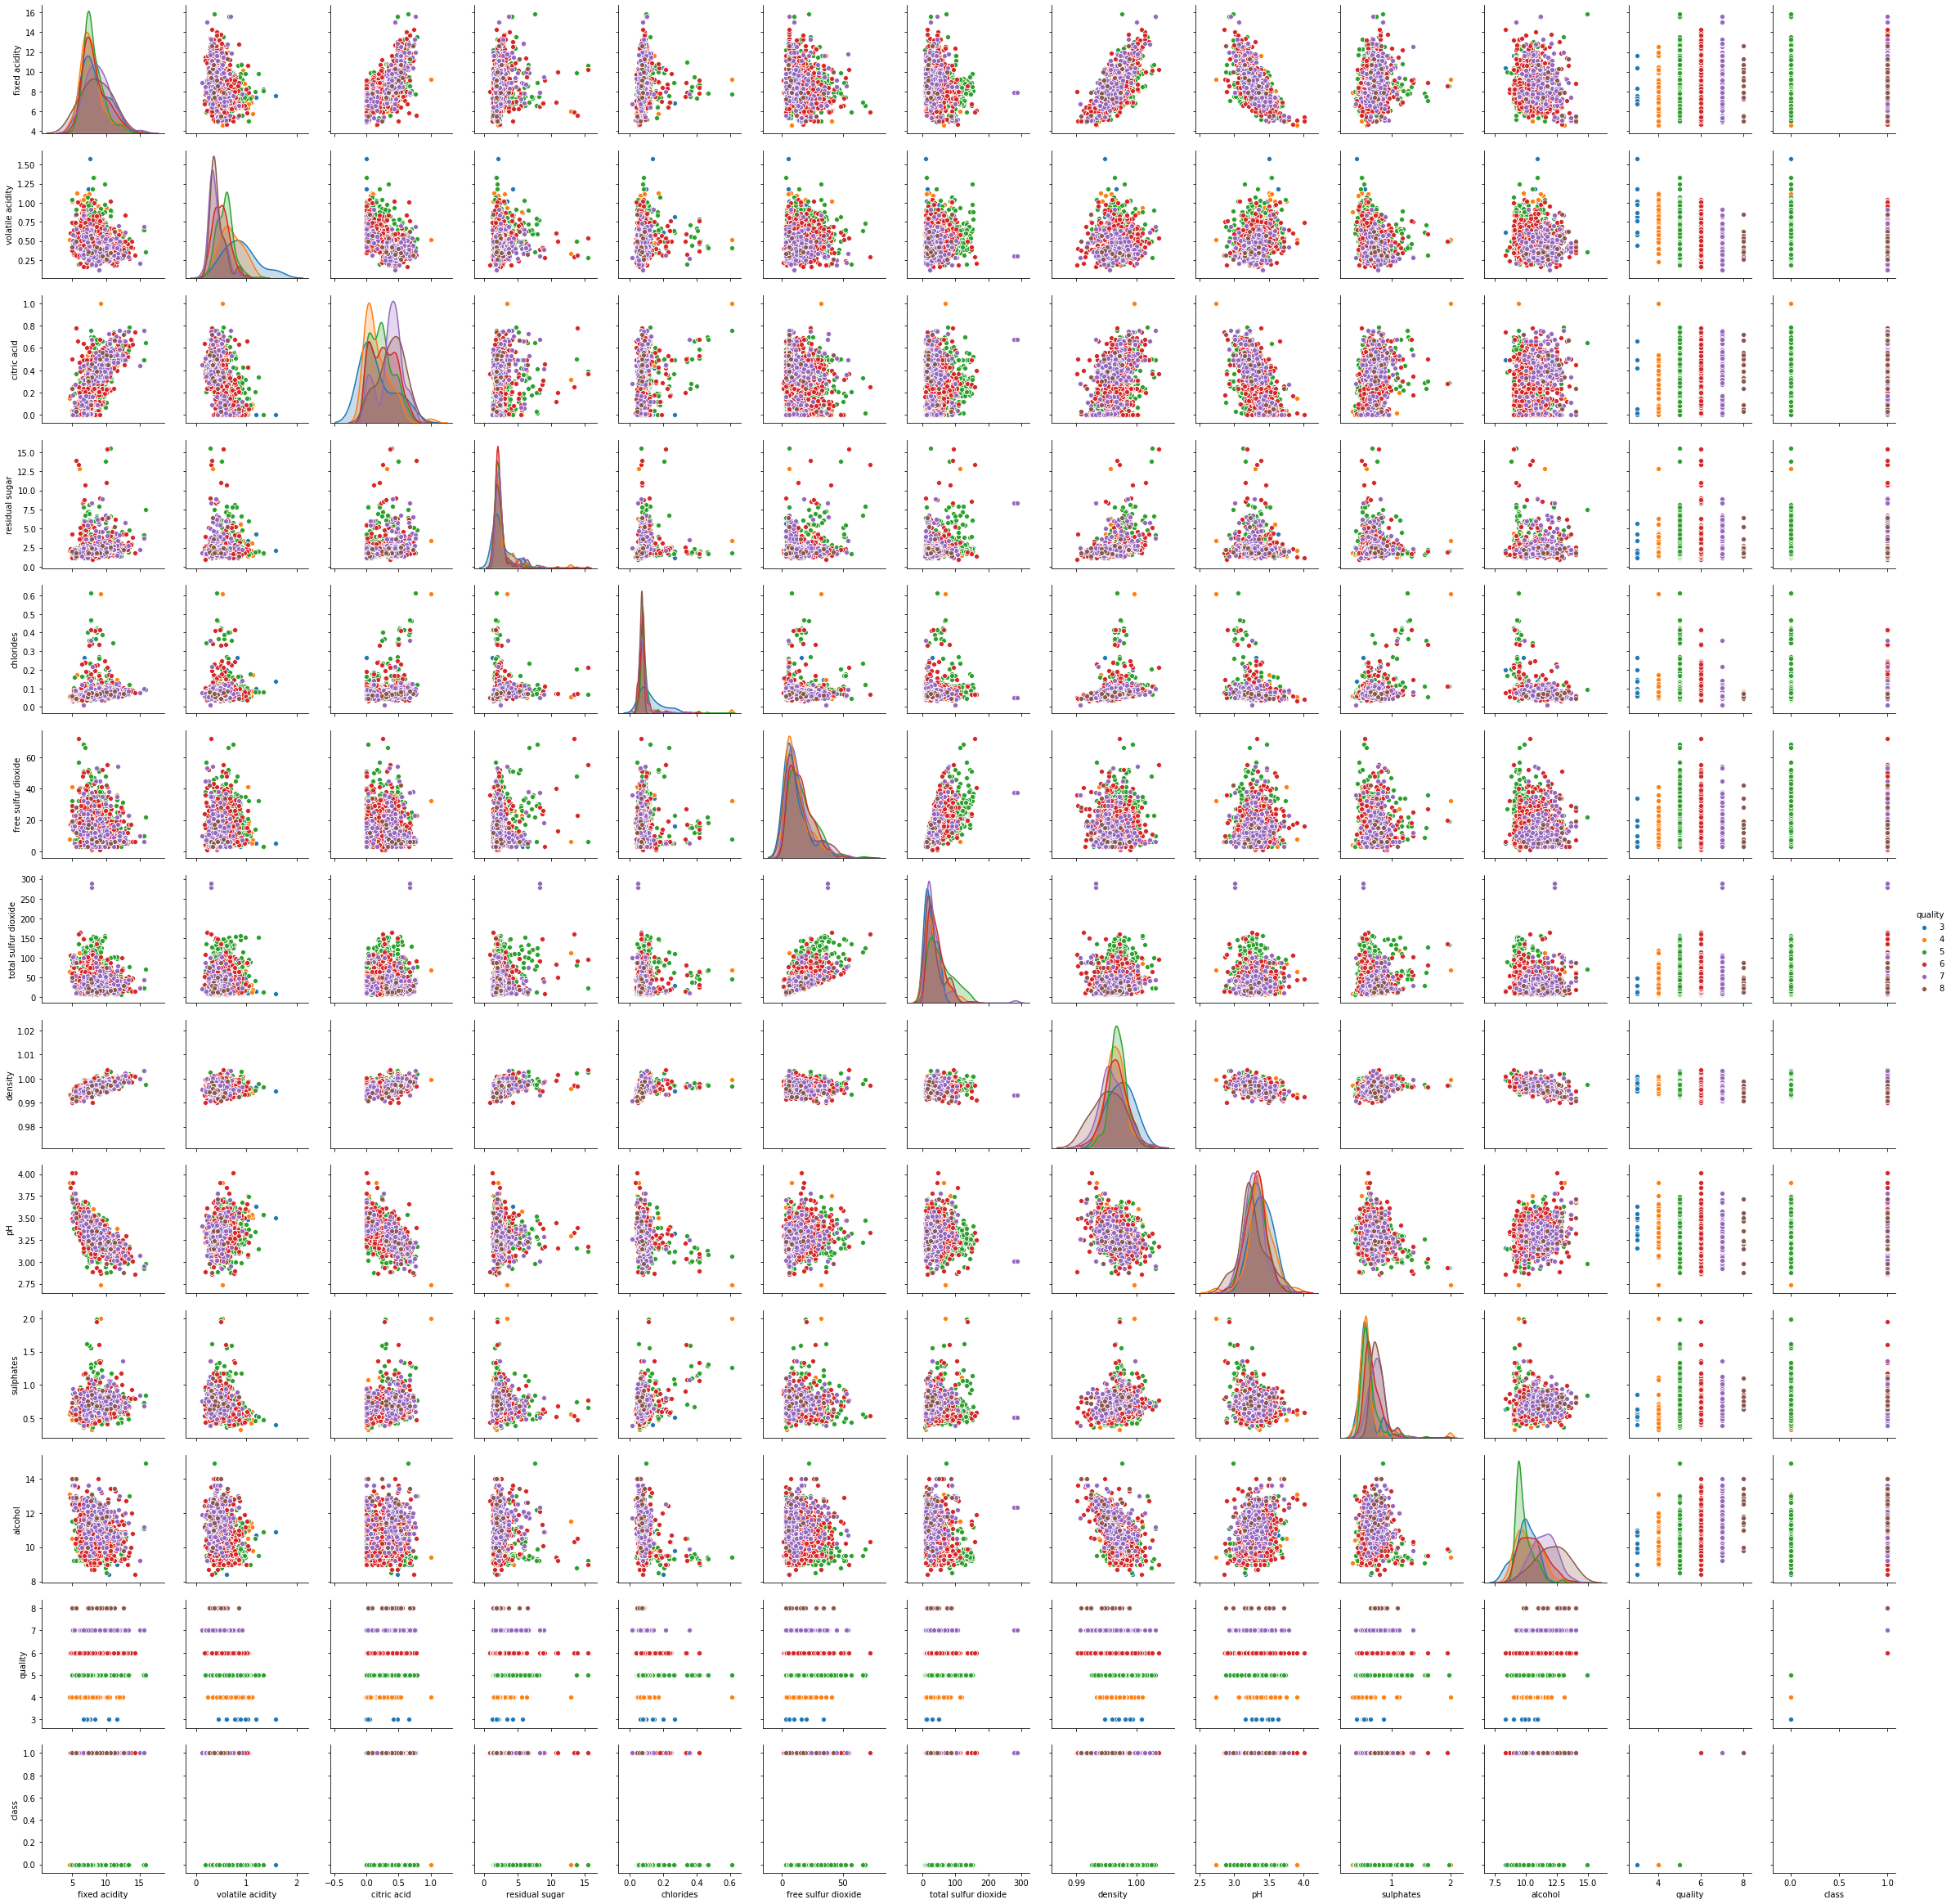

In [141]:
sns.pairplot(wine_data, hue='quality')

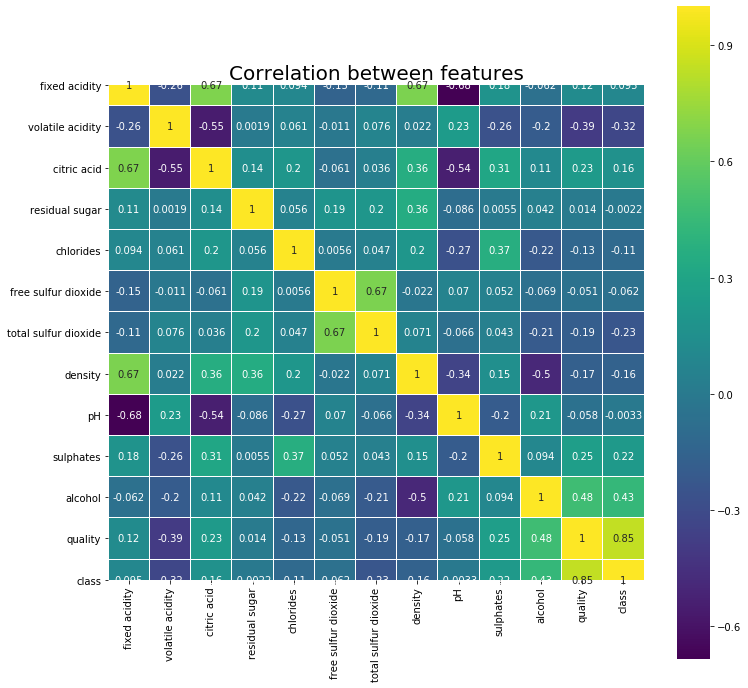

In [142]:
plt.figure(figsize=(12, 12))
sns.heatmap(wine_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features', fontsize=20)
plt.show()

## 히트맵을 보고 상관도가 있는 데이터 컬럼을 뽑아낸다.

In [151]:
y = wine_data.loc[:,'quality']
x = wine_data.loc[:,['fixed acidity','citric acid','sulphates','alcohol']]

In [152]:
# x 일 때 y가 나온다. 트레이닝 데이터80% 테스드 데이터 20% 설정 할 때 마다 값 섞는다.
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, train_size=0.8, shuffle=True)

In [153]:
knn = KNeighborsClassifier(n_neighbors=3)

In [154]:
knn.fit(x_train,y_train) # 트레이닝 시작

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [155]:
y_pred= knn.predict(x_test) # 데스트 값의 답

In [156]:
print("정답률 >>" , accuracy_score(y_test, y_pred))

정답률 >> 0.553125


In [157]:
임의데이터=[12,0.8,0.7,12]

### 임의 데이터 [12,0.8,0.7,12] 넣었을 때 quality가 7이 나옴.

In [158]:
knn.predict([임의데이터])

array([7], dtype=int64)